#Qiskit 29 -
3 server 7 vm

In [1]:
!pip install Qiskit ipywidgets
!pip install qiskit
!pip install qiskit_optimization
!pip install qiskit-optimization
!pip install cplex
!pip install ibm-quantum-widgets
!pip install docplex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
#provider = IBMQ.load_account()

In [3]:
import time
from typing import List, Optional, Any
import numpy as np
import matplotlib.pyplot as plt

from docplex.mp.model import Model

from qiskit import BasicAer
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_optimization.algorithms import CobylaOptimizer, MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram
from qiskit_optimization.algorithms.admm_optimizer import ADMMParameters, ADMMOptimizer
from qiskit_optimization.translators import from_docplex_mp

from qiskit.utils.algorithm_globals import algorithm_globals
algorithm_globals.massive=True

# If CPLEX is installed, you can uncomment this line to import the CplexOptimizer.
# CPLEX can be used in this tutorial to solve the convex continuous problem,
# but also as a reference to solve the QUBO, or even the full problem.
#
# from qiskit.optimization.algorithms import CplexOptimizer

In [4]:
# define COBYLA optimizer to handle convex continuous problems.
cobyla = CobylaOptimizer()

# define QAOA via the minimum eigen optimizer
qaoa = MinimumEigenOptimizer(QAOA(quantum_instance=BasicAer.get_backend("statevector_simulator")))

# exact QUBO solver as classical benchmark
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())  # to solve QUBOs

# in case CPLEX is installed it can also be used for the convex problems, the QUBO,
# or as a benchmark for the full problem.
#
# cplex = CplexOptimizer()

In [5]:
# construct model using docplex
mdl = Model("ex25")

#server = M = 3 = i = i0, i1, i2
#virtual machine = N = 7 = j = j0, j1, j2, j3, j4, j5, j6
#all servers have the same idle and dynamic power consumption
#all servers have the same maximum cpu capacity

si0 = mdl.binary_var(name="si0")
si1 = mdl.binary_var(name="si1")
si2 = mdl.binary_var(name="si2")

vj0i0 = mdl.continuous_var(name="vj0i0")
vj1i0 = mdl.continuous_var(name="vj1i0")
vj2i0 = mdl.continuous_var(name="vj2i0")
vj3i0 = mdl.continuous_var(name="vj3i0")
vj4i0 = mdl.continuous_var(name="vj4i0")
vj5i0 = mdl.continuous_var(name="vj5i0")
vj6i0 = mdl.continuous_var(name="vj6i0")

vj0i1 = mdl.continuous_var(name="vj0i1")
vj1i1 = mdl.continuous_var(name="vj1i1")
vj2i1 = mdl.continuous_var(name="vj2i1")
vj3i1 = mdl.continuous_var(name="vj3i1")
vj4i1 = mdl.continuous_var(name="vj4i1")
vj5i1 = mdl.continuous_var(name="vj5i1")
vj6i1 = mdl.continuous_var(name="vj6i1")

vj0i2 = mdl.continuous_var(name="vj0i2")
vj1i2 = mdl.continuous_var(name="vj1i2")
vj2i2 = mdl.continuous_var(name="vj2i2")
vj3i2 = mdl.continuous_var(name="vj3i2")
vj4i2 = mdl.continuous_var(name="vj4i2")
vj5i2 = mdl.continuous_var(name="vj5i2")
vj6i2 = mdl.continuous_var(name="vj6i2")
#vj0i3 = mdl.continuous_var(name="vj0i3")
#vj1i3 = mdl.continuous_var(name="vj1i3")
#vj2i3 = mdl.continuous_var(name="vj2i3")
#vj3i3 = mdl.continuous_var(name="vj3i3")
#vj4i3 = mdl.continuous_var(name="vj4i3")
#vj0i4 = mdl.continuous_var(name="vj0i4")
#vj1i4 = mdl.continuous_var(name="vj1i4")
#vj2i4 = mdl.continuous_var(name="vj2i4")
#vj3i4 = mdl.continuous_var(name="vj3i4")
#vj4i4 = mdl.continuous_var(name="vj4i4")

pi = 10
pd = 5

ci0 = 100
ci1 = 110
ci2 = 100
#ci3 = 90
#ci4 = 87

uj0 = mdl.continuous_var(name="uj0")
uj1 = mdl.continuous_var(name="uj1")
uj2 = mdl.continuous_var(name="uj2")
uj3 = mdl.continuous_var(name="uj3")
uj4 = mdl.continuous_var(name="uj4")
uj5 = mdl.continuous_var(name="uj5")
uj5 = mdl.continuous_var(name="uj6")

sum0 = (vj0i0+vj1i0+vj2i0+vj3i0+vj4i0+vj5i0+vj6i0)
sum1 = (vj0i1+vj1i1+vj2i1+vj3i1+vj4i1+vj5i1+vj6i1)
sum2 = (vj0i2+vj1i2+vj2i2+vj3i2+vj4i2+vj5i2+vj6i2)
#sum3 = (vj0i3+vj1i3+vj2i3+vj3i3+vj4i3+vj5i3)
#sum4 = (vj0i4+vj1i4+vj2i4+vj3i4+vj4i4+vj5i4)

mdl.minimize(pi*si0+pd*(sum0)+pi*si1+pd*uj1*(sum1)+pi*si2+pd*(sum2))#+pi*si3+pd*(sum3)+pi*si4+pd*(sum4))

mdl.add_constraint((vj0i0+vj1i0+vj2i0+vj3i0+vj4i0+vj5i0+vj6i0) >= 0.9, "cons5")
mdl.add_constraint((vj0i1+vj1i1+vj2i1+vj3i1+vj4i1+vj5i1+vj6i1) >= 0.9, "cons6")
mdl.add_constraint((vj0i2+vj1i2+vj2i2+vj3i2+vj4i2+vj5i2+vj6i2) >= 0.9, "cons7")
#mdl.add_constraint((vj0i3+vj1i3+vj2i3+vj3i3+vj4i3+vj5i3) >= 0.9, "cons8")
#mdl.add_constraint((vj0i4+vj1i4+vj2i4+vj3i4+vj4i4+vj5i4) >= 0.9, "cons9")

mdl.add_constraint((vj0i0+vj1i0+vj2i0+vj3i0+vj4i0+vj5i0+vj6i0) <= 0.99,"cons10")
mdl.add_constraint((vj0i1+vj1i1+vj2i1+vj3i1+vj4i1+vj5i1+vj6i1) <= 0.99, "cons11")
mdl.add_constraint((vj0i2+vj1i2+vj2i2+vj3i2+vj4i2+vj5i2+vj6i2) <= 0.99, "cons12")
#mdl.add_constraint((vj0i3+vj1i3+vj2i3+vj3i3+vj4i3+vj5i3) <= 0.99, "cons13")
#mdl.add_constraint((vj0i4+vj1i4+vj2i4+vj3i4+vj4i4+vj5i4) <= 0.99, "cons14")

docplex.mp.LinearConstraint[cons12](vj0i2+vj1i2+vj2i2+vj3i2+vj4i2+vj5i2+vj6i2,LE,0.99)

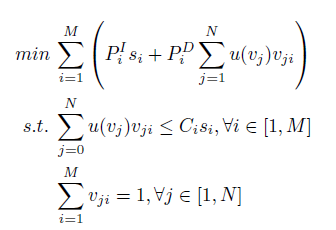

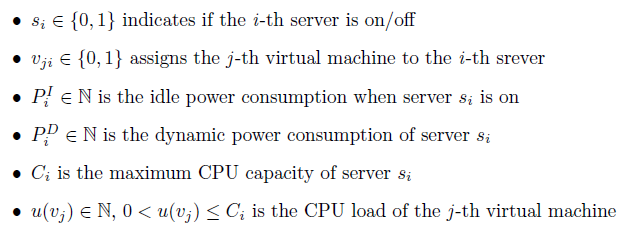

In [6]:
# load quadratic program from docplex model
qp = from_docplex_mp(mdl)
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: ex25

Minimize
 obj: 10 si0 + 10 si1 + 10 si2 + 5 vj0i0 + 5 vj1i0 + 5 vj2i0 + 5 vj3i0 + 5 vj4i0
      + 5 vj5i0 + 5 vj6i0 + 5 vj0i2 + 5 vj1i2 + 5 vj2i2 + 5 vj3i2 + 5 vj4i2
      + 5 vj5i2 + 5 vj6i2 + [ 10 vj0i1*uj1 + 10 vj1i1*uj1 + 10 vj2i1*uj1
      + 10 vj3i1*uj1 + 10 vj4i1*uj1 + 10 vj5i1*uj1 + 10 vj6i1*uj1 ]/2
Subject To
 cons5: vj0i0 + vj1i0 + vj2i0 + vj3i0 + vj4i0 + vj5i0 + vj6i0 >= 0.900000000000
 cons6: vj0i1 + vj1i1 + vj2i1 + vj3i1 + vj4i1 + vj5i1 + vj6i1 >= 0.900000000000
 cons7: vj0i2 + vj1i2 + vj2i2 + vj3i2 + vj4i2 + vj5i2 + vj6i2 >= 0.900000000000
 cons10: vj0i0 + vj1i0 + vj2i0 + vj3i0 + vj4i0 + vj5i0 + vj6i0 <= 
         0.990000000000
 cons11: vj0i1 + vj1i1 + vj2i1 + vj3i1 + vj4i1 + vj5i1 + vj6i1 <= 
         0.990000000000
 cons12: vj0i2 + vj1i2 + vj2i2 + vj3i2 + vj4i2 + vj5i2 + vj6i2 <= 
         0.990000000000

Bounds
 0 <= si0 <= 1
 0 <= si1 <= 1
 0 <= si2 <= 1

Binaries
 si0 si1 si2
End



In [7]:
admm_params = ADMMParameters(
                            rho_initial=1001,
                            beta=1000,
                            factor_c=900,
                            maxiter=100,
                            three_block=True, tol=1.e-6
                        )

In [8]:
# define QUBO optimizer
qubo_optimizer = exact
# qubo_optimizer = cplex  # uncomment to use CPLEX instead

# define classical optimizer
convex_optimizer = cobyla
# convex_optimizer = cplex  # uncomment to use CPLEX instead

# initialize ADMM with classical QUBO and convex optimizer
admm = ADMMOptimizer(params=admm_params,
                     qubo_optimizer=qubo_optimizer,
                     continuous_optimizer=convex_optimizer,
                    )

In [9]:
# run ADMM to solve problem
#%tb
%timeit
result = admm.solve(qp)

In [10]:
print(result.prettyprint())

objective function value: 9.000000000000002
variable values: si0=0.0, si1=0.0, si2=0.0, vj0i0=0.12853782169332956, vj1i0=0.12825554121849317, vj2i0=0.12802121164306693, vj3i0=0.12965664267133026, vj4i0=0.11764921173148692, vj5i0=0.13886482651752993, vj6i0=0.12901474452476344, vj0i1=0.12859594987630596, vj1i1=0.12903682961758906, vj2i1=0.12842466183129783, vj3i1=0.12858632059383804, vj4i1=0.12810958077556245, vj5i1=0.12863739091589718, vj6i1=0.12863821399544995, vj0i2=0.1292797576551589, vj1i2=0.12823662145148224, vj2i2=0.12789918188251573, vj3i2=0.1287506045252654, vj4i2=0.1287497814456662, vj5i2=0.1282388246243312, vj6i2=0.12884522841558071, uj0=0.00031698417836199084, uj1=1.0056998507632256e-20, uj2=-1.0079692072326174e-19, uj3=0.001020457955939988, uj4=0.00025588581080006643, uj5=1.4793751929269155e-05, uj6=-7.189192139820874e-20
status: INFEASIBLE


In [11]:
print(f"vj0i0=0.12853782169332956, vj1i0=0.12825554121849317, vj2i0=0.12802121164306693, vj3i0=0.12965664267133026, vj4i0=0.11764921173148692, vj5i0=0.13886482651752993, vj6i0=0.12901474452476344, vj0i1=0.12859594987630596, vj1i1=0.12903682961758906, vj2i1=0.12842466183129783, vj3i1=0.12858632059383804, vj4i1=0.12810958077556245, vj5i1=0.12863739091589718, vj6i1=0.12863821399544995, vj0i2=0.1292797576551589, vj1i2=0.12823662145148224, vj2i2=0.12789918188251573, vj3i2=0.1287506045252654, vj4i2=0.1287497814456662, vj5i2=0.1282388246243312, vj6i2=0.12884522841558071, uj0=0.00031698417836199084, uj1=1.0056998507632256e-20, uj2=-1.0079692072326174e-19, uj3=0.001020457955939988, uj4=0.00025588581080006643, uj5=1.4793751929269155e-05, uj6=-7.189192139820874e-20")

vj0i0=0.12853782169332956, vj1i0=0.12825554121849317, vj2i0=0.12802121164306693, vj3i0=0.12965664267133026, vj4i0=0.11764921173148692, vj5i0=0.13886482651752993, vj6i0=0.12901474452476344, vj0i1=0.12859594987630596, vj1i1=0.12903682961758906, vj2i1=0.12842466183129783, vj3i1=0.12858632059383804, vj4i1=0.12810958077556245, vj5i1=0.12863739091589718, vj6i1=0.12863821399544995, vj0i2=0.1292797576551589, vj1i2=0.12823662145148224, vj2i2=0.12789918188251573, vj3i2=0.1287506045252654, vj4i2=0.1287497814456662, vj5i2=0.1282388246243312, vj6i2=0.12884522841558071, uj0=0.00031698417836199084, uj1=1.0056998507632256e-20, uj2=-1.0079692072326174e-19, uj3=0.001020457955939988, uj4=0.00025588581080006643, uj5=1.4793751929269155e-05, uj6=-7.189192139820874e-20


In [12]:
vj0i0_sol=0.12853782169332956
vj1i0_sol=0.12825554121849317
vj2i0_sol=0.12802121164306693
vj3i0_sol=0.12965664267133026
vj4i0_sol=0.11764921173148692
vj5i0_sol=0.1481626070540976
vj6i0_sol=0.12901474452476344
vj0i1_sol=0.12859594987630596
vj1i1_sol=0.12903682961758906
vj2i1_sol=0.12842466183129783
vj3i1_sol=0.12858632059383804
vj4i1_sol=0.12810958077556245
vj5i1_sol=0.12863739091589718
vj6i1_sol=0.12863821399544995
vj0i2_sol=0.1292797576551589
vj1i2_sol=0.12823662145148224
vj2i2_sol=0.12789918188251573
vj3i2_sol=0.1287506045252654
vj4i2_sol=0.1287497814456662
vj5i2_sol=0.1282388246243312
vj6i2_sol=0.12884522841558071
uj0=0.00031698417836199084
uj1=1.0056998507632256e-20
uj2=-1.0079692072326174e-19
uj3=0.001020457955939988
uj4=0.00025588581080006643
uj5=1.4793751929269155e-05
uj6=-7.189192139820874e-20

vi0_sol=vj0i0_sol+vj1i0_sol+vj2i0_sol+vj3i0_sol+vj4i0_sol+vj5i0_sol
vi1_sol=vj0i1_sol+vj1i1_sol+vj2i1_sol+vj3i1_sol+vj4i1_sol+vj5i1_sol
vi2_sol=vj0i2_sol+vj1i2_sol+vj2i2_sol+vj3i2_sol+vj4i2_sol+vj5i2_sol
#vi3_sol=vj0i3_sol+vj1i3_sol+vj2i2_sol+vj3i3_sol+vj4i3_sol

vj0_sol=vj0i0_sol+vj0i1_sol+vj0i2_sol#+vj0i3_sol
vj1_sol=vj1i0_sol+vj1i1_sol+vj1i2_sol#+vj1i3_sol
vj2_sol=vj2i0_sol+vj2i1_sol+vj2i2_sol#+vj2i3_sol
vj3_sol=vj3i0_sol+vj3i1_sol+vj3i2_sol#+vj3i3_sol
vj4_sol=vj4i0_sol+vj4i1_sol+vj4i2_sol#+vj4i3_sol
vj5_sol=vj5i0_sol+vj5i1_sol+vj5i2_sol

print("vi0_sol = ",vi0_sol,"\nvi1_sol = ",vi1_sol,"\nvi2_sol = ",vi2_sol)#,"\nvi3_sol = ",vi3_sol)
print("vitot = ",vi0_sol+vi0_sol+vi1_sol+vi2_sol)
print("vj0_sol = ",vj0_sol,"\nvj1_sol = ",vj1_sol,"\nvj2_sol = ",vj2_sol,"\nvj3_sol = ",vj3_sol,"\nvj4_sol = ",vj4_sol,"\nvj5_sol = ",vj5_sol)
print("vjtot = ",vj0_sol+vj1_sol+vj2_sol+vj3_sol+vj4_sol+vj5_sol)

vi0_sol =  0.7802830360118044 
vi1_sol =  0.7713907336104905 
vi2_sol =  0.7711547715844197
vitot =  3.103111577218519
vj0_sol =  0.38641352922479444 
vj1_sol =  0.3855289922875645 
vj2_sol =  0.38434505535688046 
vj3_sol =  0.3869935677904337 
vj4_sol =  0.37450857395271553 
vj5_sol =  0.405038822594326
vjtot =  2.3228285412067144


In [13]:
print("x={:}".format(result.x))
print("fval={:.7f}".format(result.fval))
print("x={:}".format(result.state.residuals))

x=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.28537822e-01
  1.28255541e-01  1.28021212e-01  1.29656643e-01  1.17649212e-01
  1.38864827e-01  1.29014745e-01  1.28595950e-01  1.29036830e-01
  1.28424662e-01  1.28586321e-01  1.28109581e-01  1.28637391e-01
  1.28638214e-01  1.29279758e-01  1.28236621e-01  1.27899182e-01
  1.28750605e-01  1.28749781e-01  1.28238825e-01  1.28845228e-01
  3.16984178e-04  1.00569985e-20 -1.00796921e-19  1.02045796e-03
  2.55885811e-04  1.47937519e-05 -7.18919214e-20]
fval=9.0000000
x=[0.00010000000000000003, 0.00011844231455404492, 0.0001511659860726895, 0.000176875973559602, 9.947811047201252e-05, 0.00014616456241377623, 6.125858402822743e-05, 9.68869223951678e-05, 9.153050943600606e-05, 0.0001746829485464091, 3.467864469673493e-05, 0.0001338072532730838, 0.00013251833162650144, 0.00023865404742922657, 0.00017137070473588614, 0.00010069039175643583, 6.932984656379327e-05, 0.00010481578860777926, 7.063961688509655e-05, 0.00018999749724692757, 0.000100

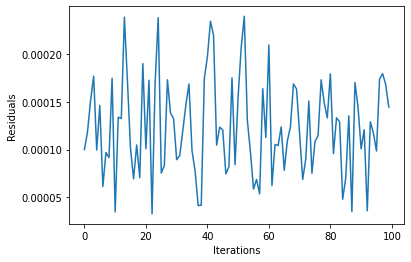

In [14]:
plt.plot(result.state.residuals)
plt.xlabel("Iterations")
plt.ylabel("Residuals")
plt.show()

In [15]:
lista = []
lista = result.state.residuals

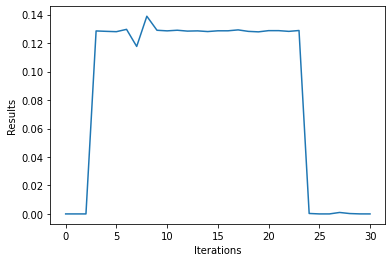

In [16]:
plt.plot(result.x)
plt.xlabel("Iterations")
plt.ylabel("Results")
plt.show()

In [17]:
#import matplotlib.pyplot as plt
#
#fig, ax = plt.subplots()
#
#f = [result.x]
#c = [40, 100, 30, 55]
#
#ax.bar(f, c,)
#
#ax.set_ylabel("Residuals")
#ax.set_title("Results")
#
#
#plt.show()

In [18]:
print(result.x)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.28537822e-01
  1.28255541e-01  1.28021212e-01  1.29656643e-01  1.17649212e-01
  1.38864827e-01  1.29014745e-01  1.28595950e-01  1.29036830e-01
  1.28424662e-01  1.28586321e-01  1.28109581e-01  1.28637391e-01
  1.28638214e-01  1.29279758e-01  1.28236621e-01  1.27899182e-01
  1.28750605e-01  1.28749781e-01  1.28238825e-01  1.28845228e-01
  3.16984178e-04  1.00569985e-20 -1.00796921e-19  1.02045796e-03
  2.55885811e-04  1.47937519e-05 -7.18919214e-20]


In [19]:
result

<ADMMOptimizationResult: fval=9.000000000000002, si0=0.0, si1=0.0, si2=0.0, vj0i0=0.12853782169332956, vj1i0=0.12825554121849317, vj2i0=0.12802121164306693, vj3i0=0.12965664267133026, vj4i0=0.11764921173148692, vj5i0=0.13886482651752993, vj6i0=0.12901474452476344, vj0i1=0.12859594987630596, vj1i1=0.12903682961758906, vj2i1=0.12842466183129783, vj3i1=0.12858632059383804, vj4i1=0.12810958077556245, vj5i1=0.12863739091589718, vj6i1=0.12863821399544995, vj0i2=0.1292797576551589, vj1i2=0.12823662145148224, vj2i2=0.12789918188251573, vj3i2=0.1287506045252654, vj4i2=0.1287497814456662, vj5i2=0.1282388246243312, vj6i2=0.12884522841558071, uj0=0.00031698417836199084, uj1=1.0056998507632256e-20, uj2=-1.0079692072326174e-19, uj3=0.001020457955939988, uj4=0.00025588581080006643, uj5=1.4793751929269155e-05, uj6=-7.189192139820874e-20, status=INFEASIBLE>

In [20]:
print(result)

fval=9.000000000000002, si0=0.0, si1=0.0, si2=0.0, vj0i0=0.12853782169332956, vj1i0=0.12825554121849317, vj2i0=0.12802121164306693, vj3i0=0.12965664267133026, vj4i0=0.11764921173148692, vj5i0=0.13886482651752993, vj6i0=0.12901474452476344, vj0i1=0.12859594987630596, vj1i1=0.12903682961758906, vj2i1=0.12842466183129783, vj3i1=0.12858632059383804, vj4i1=0.12810958077556245, vj5i1=0.12863739091589718, vj6i1=0.12863821399544995, vj0i2=0.1292797576551589, vj1i2=0.12823662145148224, vj2i2=0.12789918188251573, vj3i2=0.1287506045252654, vj4i2=0.1287497814456662, vj5i2=0.1282388246243312, vj6i2=0.12884522841558071, uj0=0.00031698417836199084, uj1=1.0056998507632256e-20, uj2=-1.0079692072326174e-19, uj3=0.001020457955939988, uj4=0.00025588581080006643, uj5=1.4793751929269155e-05, uj6=-7.189192139820874e-20, status=INFEASIBLE


In [21]:
lista

[0.00010000000000000003,
 0.00011844231455404492,
 0.0001511659860726895,
 0.000176875973559602,
 9.947811047201252e-05,
 0.00014616456241377623,
 6.125858402822743e-05,
 9.68869223951678e-05,
 9.153050943600606e-05,
 0.0001746829485464091,
 3.467864469673493e-05,
 0.0001338072532730838,
 0.00013251833162650144,
 0.00023865404742922657,
 0.00017137070473588614,
 0.00010069039175643583,
 6.932984656379327e-05,
 0.00010481578860777926,
 7.063961688509655e-05,
 0.00018999749724692757,
 0.00010080115073744558,
 0.00017260636530757445,
 3.256963170864577e-05,
 0.00016992778569748857,
 0.00023814037529696293,
 7.543663563393275e-05,
 8.341610539932634e-05,
 0.00017309136124050122,
 0.00013829223788680865,
 0.00013244444372986888,
 8.944242547167458e-05,
 9.365023189710548e-05,
 0.00011978032591071696,
 0.00014685166082240117,
 0.00016873554800225804,
 9.88014522895871e-05,
 7.766532052199279e-05,
 4.13025114205393e-05,
 4.1623967155102415e-05,
 0.0001745687055635613,
 0.00019705754445587312,

In [22]:
import statistics
print(statistics.median(lista))

0.00012018636601481591


In [23]:
result.state

<qiskit_optimization.algorithms.admm_optimizer.ADMMState at 0x7f139d9c9a10>

In [24]:
result.state.residuals

[0.00010000000000000003,
 0.00011844231455404492,
 0.0001511659860726895,
 0.000176875973559602,
 9.947811047201252e-05,
 0.00014616456241377623,
 6.125858402822743e-05,
 9.68869223951678e-05,
 9.153050943600606e-05,
 0.0001746829485464091,
 3.467864469673493e-05,
 0.0001338072532730838,
 0.00013251833162650144,
 0.00023865404742922657,
 0.00017137070473588614,
 0.00010069039175643583,
 6.932984656379327e-05,
 0.00010481578860777926,
 7.063961688509655e-05,
 0.00018999749724692757,
 0.00010080115073744558,
 0.00017260636530757445,
 3.256963170864577e-05,
 0.00016992778569748857,
 0.00023814037529696293,
 7.543663563393275e-05,
 8.341610539932634e-05,
 0.00017309136124050122,
 0.00013829223788680865,
 0.00013244444372986888,
 8.944242547167458e-05,
 9.365023189710548e-05,
 0.00011978032591071696,
 0.00014685166082240117,
 0.00016873554800225804,
 9.88014522895871e-05,
 7.766532052199279e-05,
 4.13025114205393e-05,
 4.1623967155102415e-05,
 0.0001745687055635613,
 0.00019705754445587312,

[0.00012141369162106502,
 0.0001598523981620667,
 0.0001363096183023072,
 0.00013366164218028267,
 0.00019449940125445926,
 0.00024421444450206735,
 0.00025167611916002527,
 0.00021537106591262232,
 0.00017643815976730237,
 0.00020383167704402593,
 0.00020170300246574247,
 0.000206931492765146,
 0.00018333844684891904,
 0.00021713388762022385,
 0.00020994328184666586,
 0.00024296944946516823,
 0.00024457664693026417,
 0.0002482295854048988,
 0.00018674532898820407,
 0.00019769590967444976,
 0.00019411858974276858,
 0.00024375739869511538,
 0.0002089992531592181,
 0.00020951181251973,
 0.0002483011004500093,
 0.0002250386902197582,
 0.00016766718356675924,
 0.00018897679470788073,
 0.00021242228282042198,
 0.00016713528881829182,
 0.00018282550408267565,
 0.00020721244869612994,
 0.00021869402792425632,
 0.00022081927154776182,
 0.00022754474554158595,
 0.00020706677412881896,
 0.00022560653748116146,
 0.00019025344701929618,
 0.0002385655425094464,
 0.00021635261763172078,
 0.00015843035492153822,
 0.00023195609359490414,
 0.0001720417937579681,
 0.0002204567297929457,
 0.00020705422902170338,
 0.00022724698997758188,
 0.0001886879055553237,
 0.00016933489224124583,
 0.00023193334781205417,
 0.00024620261401048693,
 0.00021665867994080212,
 0.00017219817427995945,
 0.0002075162072621998,
 0.00019728938796329234,
 0.0002028710199885681,
 0.0002199754406369366,
 0.00021008534603531942,
 0.0002331317949101826,
 0.00018383408521425608,
 0.00016520636586350823,
 0.00017108218707767957,
 0.00020963499258483986,
 0.0002223718285616617,
 0.0001977060669191568,
 0.00021587937372126003,
 0.0002284688515442429,
 0.00024385221917543986,
 0.00022164365397135498,
 0.0002339541056982006,
 0.00023184329593895061,
 0.00019166237528336544,
 0.00012148903950409603,
 0.0002023643240921501,
 0.00020890726059580848,
 0.00017840574866187555,
 0.00023026937836401358,
 0.0002077260937902401,
 0.0002160060175027085,
 0.00020155481028227344,
 0.00016570810369272447,
 0.0002154519837066465,
 0.0002047177186078402,
 0.00022776723077289258,
 0.0002004791382536291,
 0.00019532522431252858,
 0.0001965864008870737,
 0.00024713351166330756,
 0.0002225147745767656,
 0.00023356609090968112,
 0.00018672295206642652,
 0.00017706244697246435,
 0.0002312611336018245,
 0.00016143810647910342,
 0.00017801328530882057,
 0.00023217463560229267,
 0.00016807407152833376,
 0.00019893348274143088,
 0.00018770003833946695,
 0.00013960812242918945,
 0.0001762894637224225]

In [25]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright